# Newton's Method

In [52]:
import numpy as np 
import scipy.optimize as opt
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
import matplotlib.pyplot as plt

### Problem 1

In [11]:
def newton_method(f, x0, tol=1e-15, maxiters=15):
    
    der_f = grad(f)
    
    for k in range(maxiters):
        x1 = x0 - f(x0)/der_f(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return x1

In [12]:
def f(x):
    return anp.exp(x)-2

In [14]:
newton_method(f, 1., tol=1e-15, maxiters=15)

0.6931471805599453

In [15]:
opt.newton(f, 1)

0.6931471805599454

In [17]:
def f(x):
    return x**4-3

In [18]:
newton_method(f, 1., tol=1e-15, maxiters=15)

1.3160740129524924

In [36]:
opt.newton(f, 1)

1.3160740129524924

### Problem 3

In [19]:
def newton_method(f, x0, alpha, tol=1e-15, maxiters=15):
    
    der_f = grad(f)
    
    for k in range(maxiters):
        x1 = x0 - alpha*f(x0)/der_f(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return x1

In [21]:
f = lambda x: anp.sign(x) * anp.power(anp.abs(x), 1./3)

In [24]:
newton_method(f, 0.01, 1.)

-327.68000000000075

In [25]:
newton_method(f, 0.01, 0.4)

-3.2767999999997705e-13

### Problem 4

In [132]:
def backtrack_iter(f, x0, alpha, tol=1e-15):
    
    iter_ = 0
    der_f = grad(f)
    
    while True:
        x1 = x0 - alpha*f(x0)/der_f(x0)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
        iter_ += 1
        
    return iter_

In [133]:
f = lambda x: anp.sign(x) * anp.power(anp.abs(x), 1./3)

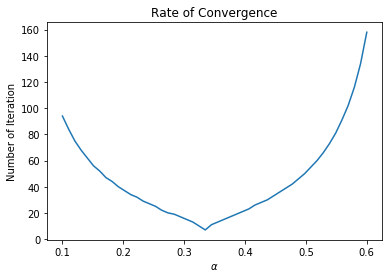

In [137]:
n = 50
alpha = np.linspace(1e-1, 0.6, n)
iters = np.zeros(n)
for i in range(n):
    iters[i] = backtrack_iter(f, 1., alpha[i])
plt.plot(alpha, iters)
plt.title('Rate of Convergence')
plt.xlabel(r'$\alpha$')
plt.ylabel('Number of Iteration')
plt.show()

### Problem 7

In [148]:
def basins_attr(f, Df, zeros, bounds, res, iters):
    
    r_min, r_max, i_min, i_max = bounds
    x_real = np.linspace(r_min, r_max, res) # Real parts.
    x_imag = np.linspace(i_min, i_max, res) # Imaginary parts.
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    
    # Newton's Method
    for ii in range(iters):
        X_k = X_0 - f(X_0) / Df(X_0)
        X_0 = X_k
    
    Y = np.array([np.argmin(abs(zeros - i)) for i in X_k.ravel()]).reshape((res, res))
    
    plt.pcolormesh(x_real, x_imag, Y, cmap = "brg")

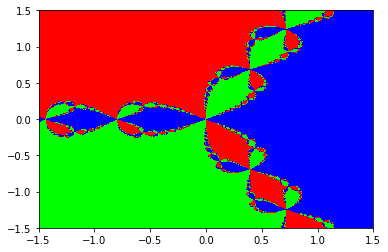

In [150]:
bounds = np.array([-1.5,1.5,-1.5,1.5])
f = lambda x:x**3 -1
Df = lambda x : 3 * x**2
zeros = np.array([1, -0.5+1j*np.sqrt(3)/2, -0.5-1j*np.sqrt(3)/2])
basins_attr(f, Df, zeros, bounds, 500, 10)

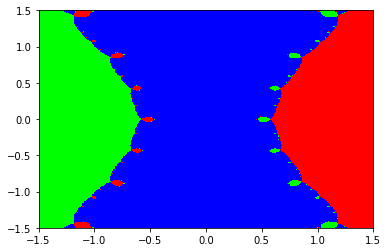

In [151]:
bounds = np.array([-1.5, 1.5, -1.5, 1.5])
f = lambda x: x**3 - x
Df = lambda x: 3*x**2 - 1
zeros = np.array([0, 1, -1])
basins_attr(f, Df, zeros, bounds, 500, 10)